# Introducing Scikit-Learn 

## Brief History
- Sklearn was originally created as a “Google Summer Of Code” project by David Cournapeau under the New Berkeley Software Distribution License in June of 2007. 
- The name Scikit stems from the combination of two terms, Scipy and Kit
- Sklearn has grown far beyond just being a toolkit for Scipy. 
- This is due to an amazing commitment from a core of developers that contributed their time and expertise free of charge. 
- The aim was to make machine learning accessible and useful to the Python scientific community  

## Why is it so successful? 
- First and foremost it is a rich, and extensive Python library for implementing machine learning. 
- It is also probably the best learning resource to learn about the different concepts of ML 
- But probably the central reason is that it has a strict set of programmatic design patterns that make it easy to use even if you don't understand the full complexity of the tool. 


## Sklearn design patterns 
- Design Patterns are typical solutions to commonly occurring problems in software design.
- Each pattern is like a blueprint that you can customize to solve a particular design problem in your code.
- Importantly, an object can depend on more than one class. 


### The design patterns impose the following guiding principles
- See [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238) for more details 
- **Consistency**: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
- **Inspection**: All specified parameter values are exposed as public attributes.
- **Limited object hierarchy**: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s, SciPy sparse matrices) and parameter
  names use standard Python strings.
- **Composition**: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.
- **Sensible defaults**: When models require user-specified parameters, the library defines an appropriate default value.

## High level organization 
- The Sklearn library is organized around three fundamental classes: Estimator, Transformers and Predictors



### Estimators
- Estimators represent the core interface in Scikit-Learn. 
- All learning algorithms, whether supervised or unsupervised, classification, regression, or clustering, implement the Estimator interface and expose a `fit` method.
- An Estimator’s `fit` method takes as input a (training) feature space and in the case of supervised learning target labels and in this way the estimator “learns” to either `transform` or `predict` an output from some input data.
- predict methods take the input features and return something that is qualitatively different, i.e. labels y (in supervised settings) or cluster memberships (in most clustering settings).

- transform, on the other hand, as its name already implies, returns something that is qualitatively similar to its input but expressed in a different form, i.e. scaled features, PCA features etc. And as a rule, they are usually accompanied with a respective inverse_transform method to return the input to its original form (while arguably we cannot imagine an inverse_predict method, to go from labels or cluster memberships to features).

- This difference also exists to support a set of methods that can be used for both prediction and transformation 
- For example partial least square regression is a method that tries to reduce dimensionality of a dataset relative to a response vector 


### Transformers
Transformers modify data. And can be applied to either seen or unseen data. 
Transformers all have estimators with the `fit` methods as learning stage and will transform the data into an output using the `transform` or `fit_transform` methods 

The library provided a set of transformers all focused on modifying data: 
  - [Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html), 
    - Scaling 
    - Non-linear transformation 
    - Discretization
    - Imputation 
    - And polynomial feature expansion 
  - [feature selection](https://scikit-learn.org/stable/modules/feature_selection.html), 
    - Feature removal 
    - Statistical feature selection 
    - Recursive feature elimination
    - Sequential feature selection
  - [feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html)
    - Domain specific feature extraction from canonical information types
    - e.g. image or text  
  - [dimensionality reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html)
    - PCA and many more 


### Predictors 
- Every estimator can either transform data using a transformer or predict information using a predictor 
- This is done using the `predict` , `predict_prob` or `fit_predict`
- Because of the strong design patterns it is simple to pipe together multiple operations to provide a pipeline of steps that will automate processing and cleaning stages but also the later prediction stages. 
- This can be wrapped into a process that can be used in production in real live settings



### Hyper-parameters 
- Following the basic data tidying steps (i.e. defining data types and creating some standard data acquisition protocol)
the machine learning cycle in sk-learn is composed of six distinct steps - these can be iterated many times :

1. Data splitting to training and testing/validation
1. Detect and deal with outliers 
   1. This can be a manual step performed once for static datasets 
   2. And should be automated for dynamic datasets 
1. Decide on how to deal with missing data 
   1. Drop or impute 
1. Feature engineering stage 
   1. Create, reduce by selection or extraction, expand by manual design or automatic one
   2. Again can be manual or automatic deterministic or stochastic
1. Fit the data to current data 
1. Evaluate the solution performance 

- All of these steps can be programmable and as a result will have some parameters to tune 
- While you can in most cases use the defaults all of the methods contained in sklearn and in machine learning in general rely on a set of parameters that can have dramatic effects on the output of the algorithmic pipeline





## Sklearn manifest

![](https://scikit-learn.org/stable/_static/ml_map.png)

## Let's use a simple classic example to learn the basics of the library 

- The sk-learn library contains multiple datasets that can be used to explain complex concepts 
- Today we will use one I mentioned the NIST dataset 
- The main reason is that it is simple it has concrete ground truth bu can be used as an example to both supervised and unsupervised challenges
- On your home challenge you will try the same logic on the 12_tasks dataset to clarify the benefit outlier detection and removal we covered last week  

## Unsupervised Learning : Or learning from data 
As you recall this branch of learning has two main problems : 
- Dimensionality reduction is focused on reducing the amount of features by constructing new features by some form of transformation applied on the original features
- Clustering is the process of learning some function that is able to assign a label to each point in the feature space based on some natural patterns the dataset contains

### We will cover the first algorithm using two different datasets
- We start by loading and exploring the first dataset  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from IPython.display import display, Markdown 
digits = load_digits()

ModuleNotFoundError: No module named 'seaborn'

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [446]:
display(Markdown(digits['DESCR']))

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16. This reduces dimensionality and gives invariance to small
distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
1994.

.. topic:: References

  - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
    Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
    Graduate Studies in Science and Engineering, Bogazici University.
  - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
  - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
    Linear dimensionalityreduction using relevance weighted LDA. School of
    Electrical and Electronic Engineering Nanyang Technological University.
    2005.
  - Claudio Gentile. A New Approximate Maximal Margin Classification
    Algorithm. NIPS. 2000.


## next visualize the data to get a feel of the dataset complexity
- The data is composed of a feature space of 64 columns and a single response vector 
- Let's create a table to simplify exploration 

In [3]:
df_digits = pd.DataFrame(digits['data'],columns=digits['feature_names'])
df_digits = df_digits.assign(y = digits['target'])

In [4]:
df_digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


## We should also examine some statistics 
- At least the average and standard deviation
- And also the association between the numbers

<AxesSubplot:ylabel='y'>

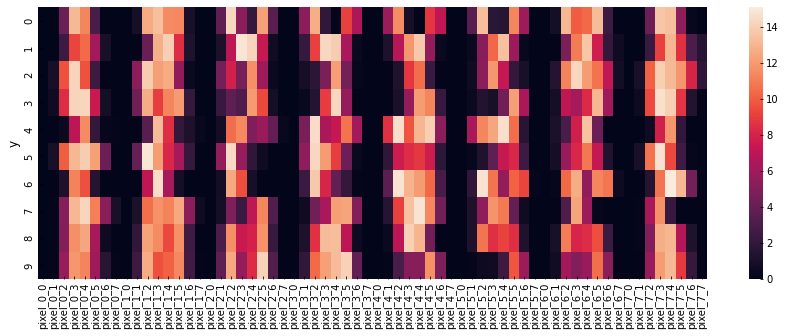

In [448]:
fig,ax = plt.subplots(figsize=(15,5))
sns.heatmap(df_digits.groupby('y').agg('mean'),ax=ax)

<AxesSubplot:ylabel='y'>

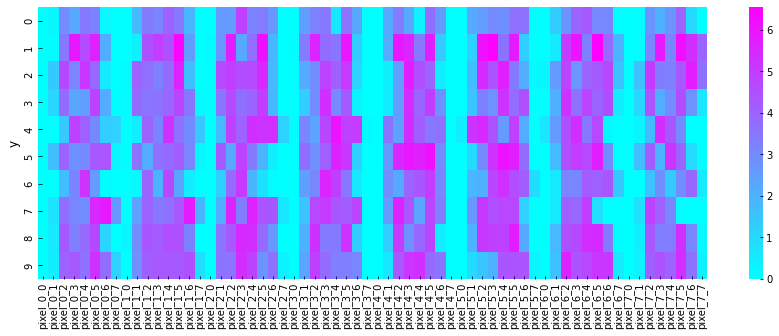

In [449]:
fig,ax = plt.subplots(figsize=(15,5))
sns.heatmap(df_digits.groupby('y').agg('std'),ax=ax,cmap='cool')

<AxesSubplot:>

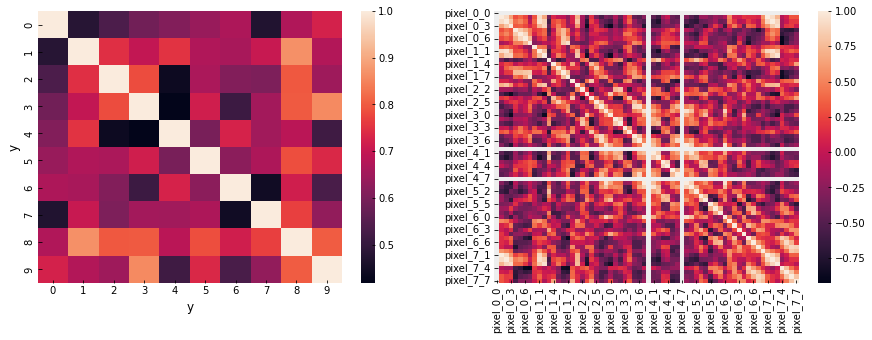

In [450]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.heatmap(df_digits.groupby('y').agg('mean').T.corr(),ax=ax[0])
sns.heatmap(df_digits.groupby('y').agg('mean').corr(),ax=ax[1])

<AxesSubplot:>

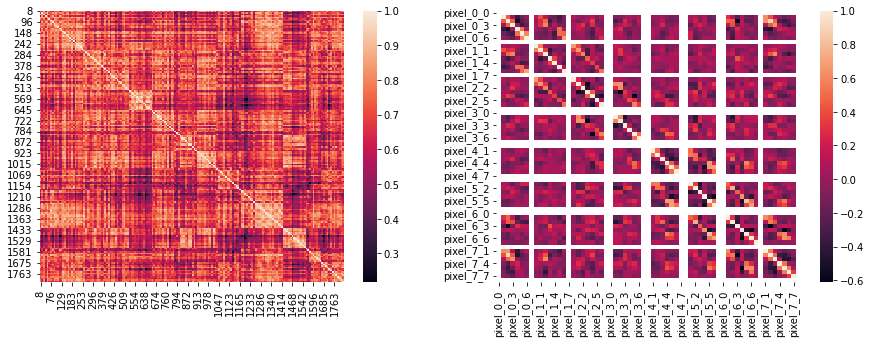

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.heatmap(df_digits[df_digits.y == 8].T.corr(),ax=ax[0])
sns.heatmap(df_digits[df_digits.y == 8].corr(),ax=ax[1])

# These don't look like numbers to view the numbers we need to reshape the data 

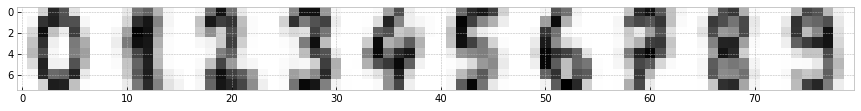

In [451]:
fig,ax = plt.subplots(1,1,figsize=(15,5))

ax.imshow(np.hstack([d.reshape(8,8) for d in df_digits.groupby('y').agg('mean').to_numpy()]),cmap='Greys')

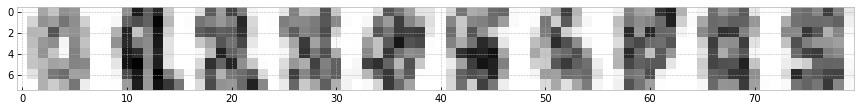

In [452]:
fig,ax = plt.subplots(1,1,figsize=(15,5))

ax.imshow(np.hstack([d.reshape(8,8) for d in df_digits.groupby('y').agg('std').to_numpy()]),cmap='Greys')

## Before we continue with the digit example 
- We will take a break 
- And take a short de-tour to examine PCA on a more heterogeneous dataset